# Portfolio assignment 6
Perform a univariate analysis on at least 2 columns with categorical data and on at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4.

In [100]:
import pandas as pd

In [101]:
data = pd.read_csv("4.data.txt")
data.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


### Selection of columns Gender, Age, City and Month

In [102]:
subdata = data[['gender', 'age', 'city', 'month', 'county_income']]
subdata.head()
print('Rows:', len(subdata))

Rows: 467


This dataset contains data of police killings. There is information about de victims, like name, gender and income. This dataset also contains data about the population of the tract in which the killing happened, like population, average income and unemployment rate. 

The data is from the first 5 months of 2015 only.

There are 467 rows, this means that there where 467 police killings in 5 months. This is an average of 3.1 per day.

### Drop data from Age with value  'unknown'

In [103]:
badrows = subdata[ subdata.age == 'Unknown' ]
subdata = subdata.drop(badrows.index, axis=0)

### Convert Age to floats

In [104]:
subdata['age'] = subdata['age'].astype(float)

### Min and max Age at which people are killed in 2015

In [105]:
subdata['age'].min()

16.0

In [106]:
subdata['age'].max()

87.0

<AxesSubplot:title={'center':'Victims per age'}, ylabel='Frequency'>

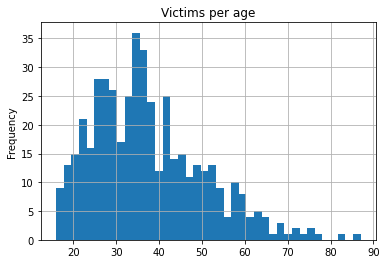

In [107]:
subdata['age'].plot(kind='hist', bins=40, grid=True, title="Victims per age")

This chart shows the count of people who are killed by the police, sorted by there age. The data is from 2015 only.

The youngest victim was 16 and the oldest 87 years old. The most victims are between the age range of 25 and 40.

### Month in which people are killed

<AxesSubplot:title={'center':'Killings per month'}>

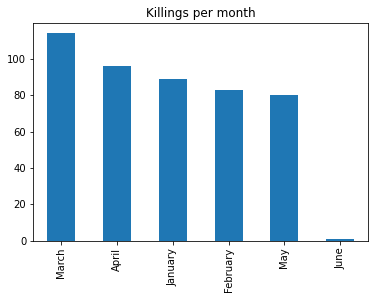

In [108]:
subdata['month'].value_counts().plot(kind='bar', title="Killings per month")

*There is only data from the first two days of June.

From this chart most victims are killed by the police in March, followed by April. With this data there is not a notable
difference between the summer and winter. Those five months all lie in the 80 - 120 range. 

There is a lot of data missing, so we can not draw any conclusions from this chart.

### Killings and income

<AxesSubplot:title={'center':'Killings per median county-income'}, ylabel='Frequency'>

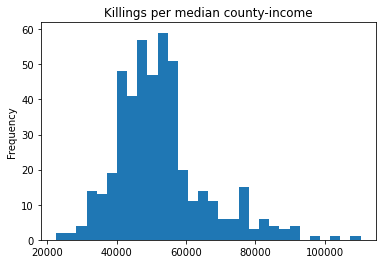

In [118]:
subdata['county_income'].plot(kind='hist', bins=30, title="Killings per median county-income")

*county_income is the median income on county level. For reference: the USA is divided into 3,243 counties.

The most killings are in counties where the median income is between \\$40.000 and \\$60.000 per year. There are a few outliers on the high side, with 2 victims from a county with a median income higher than $100.000.

### Cities with more than one victim

<AxesSubplot:title={'center':'killings per city'}>

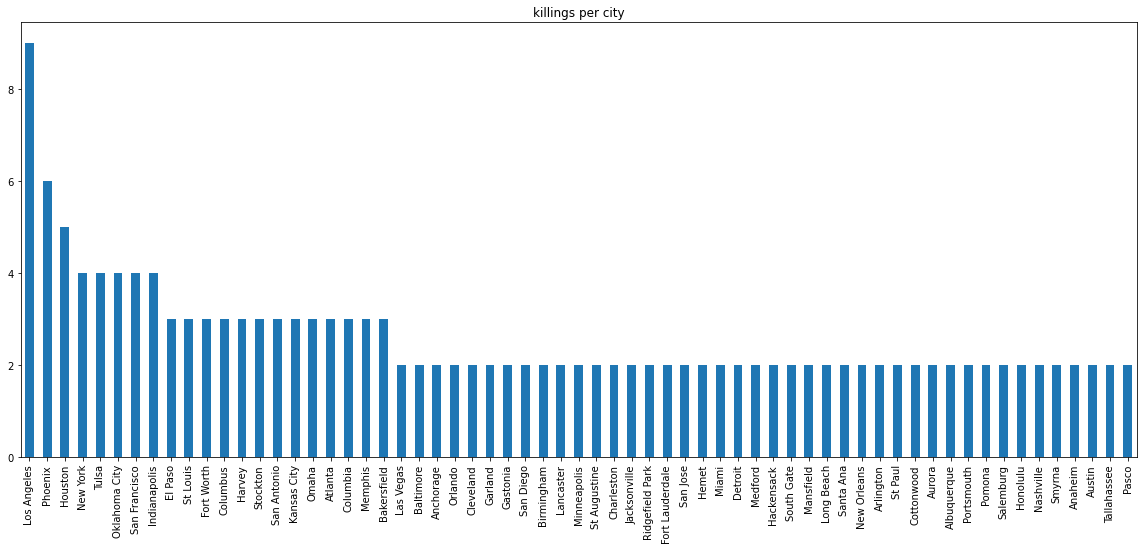

In [165]:
citiesWithMoreThanOneVictim = subdata.groupby('city').filter(lambda x: len(x) > 1)
citiesWithMoreThanOneVictim['city'].value_counts().plot(kind='bar', figsize=(20,8), title="killings per city")

Los Angeles has with 9 victims the most police killings in the first five months of 2015. The city is followed by Phoenix with 6 victims. 

Maybe those cities have an extremely violent police department?

In [177]:
print('Average killings:    ', subdata['city'].value_counts().mean())
print('Above average cities:', len(citiesWithMoreThanOneVictim), 'of', len(subdata.groupby('city')))

Average killings:     1.2754820936639117
Above average cities: 163 of 363


The average victim count per city is 1.3 people. 55% of the cities where citizens had been killed had only one victim.

Again, this data is only of the first 5 months of 2015, so these numbers is not even half of the final count. We could therefore draw the conclusion here that there are a few cities where police killings are a common thing, cites like LA, Phoenix and Houston. But they do happen all over the country, for there are so many cities with at least one victim. 